<div style="text-align: center; font-size: 30pt; font-weight: bold; margin: 1em 0em 1em 0em">Assignment 2</div>

For better readability, this `Jupyter Notebook` calls upon a separate module, defined in `module.py`.

In [1]:
import gym

from tqdm import tqdm

from itertools import product

import numpy as np

In [3]:
np.set_printoptions(precision=2)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# LaTeX rendering in graphs
try:
    plt.rc('text', usetex=True)
except:
    pass

plt.rc('font', family='serif')

# High resolution graphs
%config InlineBackend.figure_format = 'retina'

In [6]:
%reload_ext autoreload
%autoreload 2

In [7]:
import taxi

In [8]:
environment = gym.make('Taxi-v2')

# Some usefull functions

## Effect of the parameters

In [24]:
alphas = [0.1, 0.5, .9]
temperatures = [.1, 1, 10]

In [25]:
def get_returns(agent):
    return np.array([agent.run() for _ in range(10)])

In [26]:
def try_parameters(agent_class, alphas, temperatures):
    
    tries = np.empty((len(alphas), len(temperatures), 2))
    
    iterator = tqdm(
        product(enumerate(temperatures), enumerate(alphas)),
        ascii=True,
        ncols=100,
        total=9
    )
    
    for (i, temperature), (j, alpha) in iterator:
        agent = agent_class(environment, alpha=alpha, temperature=temperature)
        tries[i, j] = get_returns(agent)[:, -1, :].mean(axis=0)
            
    return tries

In [27]:
def plot_tries(tries, alphas, temperatures, name, mode='training'):
    ts = tries[:, :, 0] if mode == 'training' else tries[:, :, 1]
    
    for t, temperature in zip(ts, temperatures):
        plt.plot(alphas, t, label='temperature : {}'.format(temperature))
        
    plt.xlabel('Learning rate')
    plt.ylabel('Mean return')
    plt.legend()
    plt.savefig('graphics/{}-mean-{}-return.pdf'.format(name, mode), bbox_inches='tight')
    plt.show()

## Learning curve

In [28]:
def plot_learning_curve(returns, name):
    training_returns = returns[:, :, 0]
    tr_mean = training_returns.mean(axis=0)
    tr_90 = np.percentile(training_returns, 90, axis=0)
    tr_10 = np.percentile(training_returns, 10, axis=0)
    
    plt.figure(figsize=(8, 5))
    plt.plot(tr_90, label='9th decile', linestyle='--', color='green', linewidth=.8)
    plt.plot(tr_10, label='1st decile', linestyle='--', color='red', linewidth=.8)
    plt.plot(tr_mean, label='mean learning curve')
    plt.xlabel('Number of episode')
    plt.ylabel('Mean return')
    plt.legend()
    plt.savefig('graphics/{}-learning-curve.pdf'.format(name), bbox_inches='tight')
    plt.show()

# Sarsa

In [29]:
agent = taxi.Sarsa(environment, gamma=1, alpha=.9, temperature=1, seed=None, verbose=True)
agent.initialise()

In [30]:
tries = try_parameters(taxi.Sarsa, alphas=[0.1, 0.5, .9], temperatures=[.1, 1, 2])

100%|#################################################################| 9/9 [05:13<00:00, 33.29s/it]


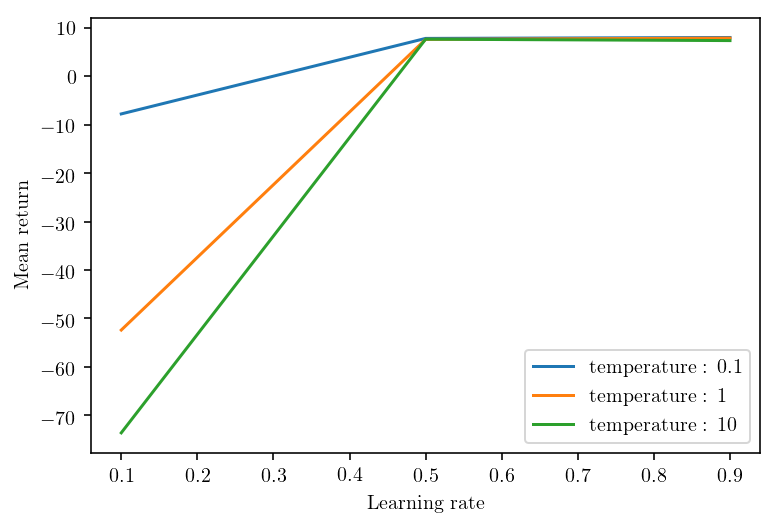

In [22]:
plot_tries(tries, alphas, temperatures, 'sarsa', mode='training')

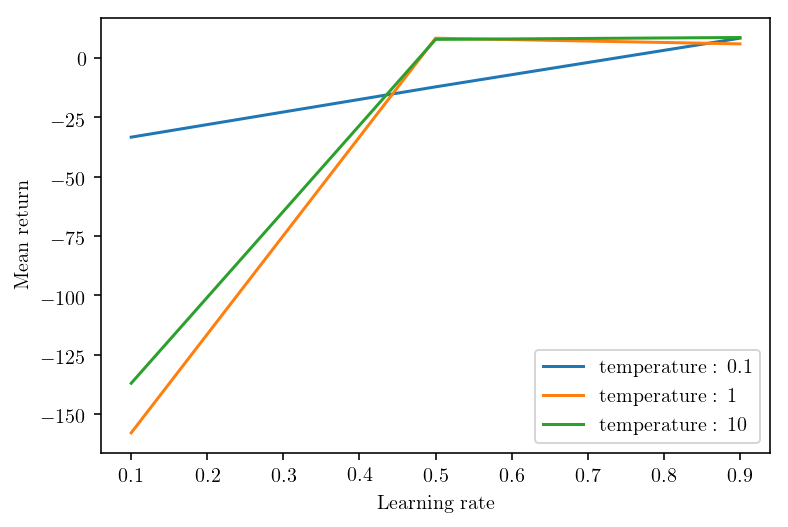

In [23]:
plot_tries(tries, alphas, temperatures, 'sarsa', mode='testing')

In [15]:
returns = get_returns(agent)

100%|#############################################################| 100/100 [00:01<00:00, 50.02it/s]


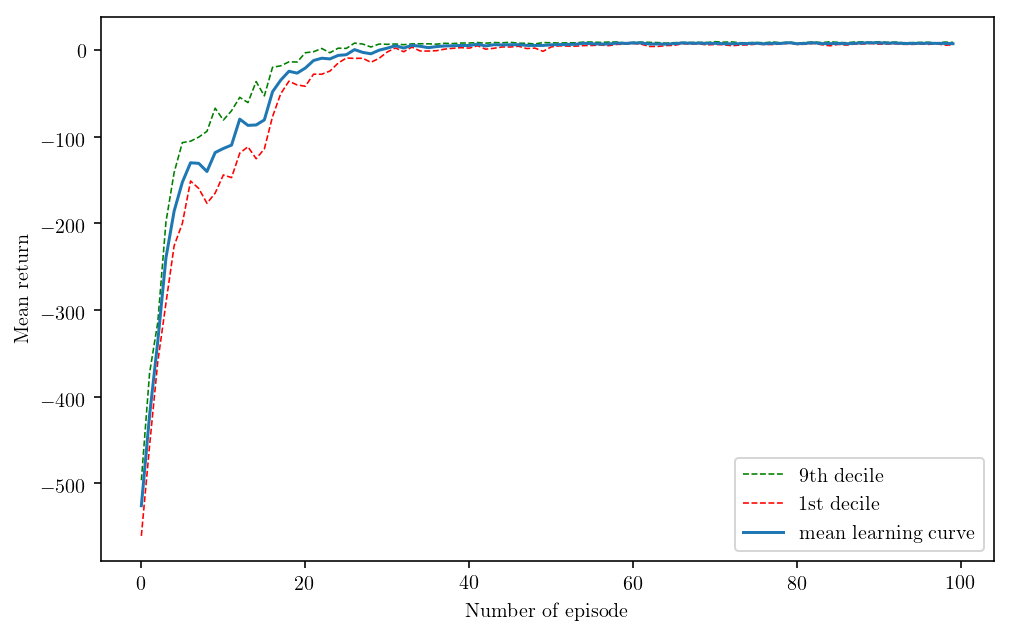

In [16]:
plot_learning_curve(returns, 'sarsa')

# Expected Sarsa

In [14]:
agent = taxi.ExpectedSarsa(environment, gamma=1, alpha=.9, temperature=1, seed=0, verbose=True)
agent.initialise()

In [15]:
returns = np.array([agent.run() for _ in range(10)])

100%|#############################################################| 100/100 [00:01<00:00, 52.79it/s]


In [16]:
training_returns = returns[:, :, 0]
tr_mean = training_returns.mean(axis=0)
tr_90 = np.percentile(training_returns, 90, axis=0)
tr_10 = np.percentile(training_returns, 10, axis=0)

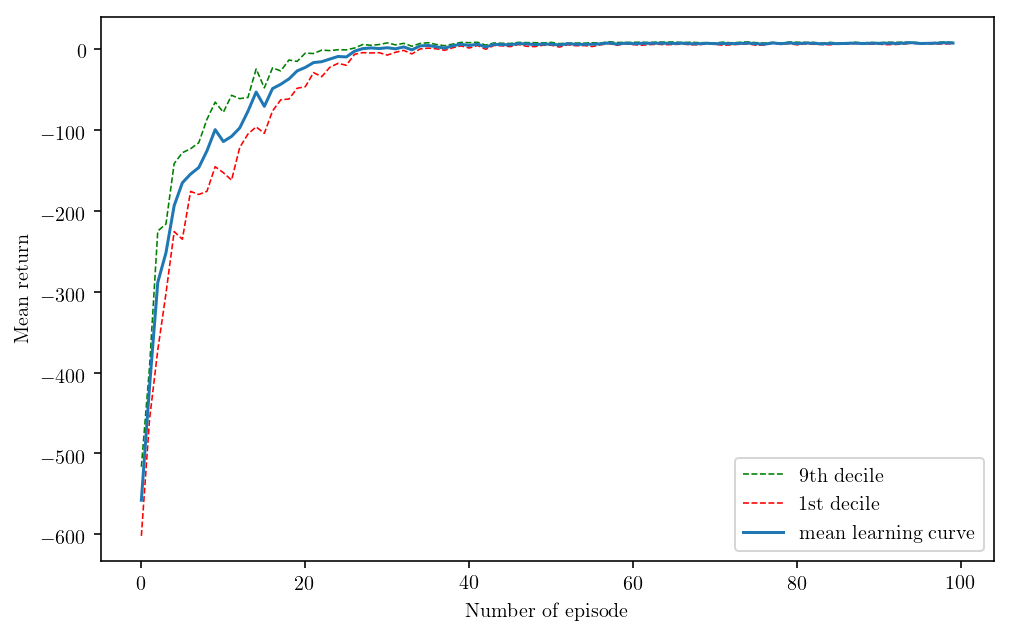

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(tr_90, label='9th decile', linestyle='--', color='green', linewidth=.8)
plt.plot(tr_10, label='1st decile', linestyle='--', color='red', linewidth=.8)
plt.plot(tr_mean, label='mean learning curve')
plt.xlabel('Number of episode')
plt.ylabel('Mean return')
plt.legend()
plt.savefig('graphics/expected-sarsa-learning-curve.pdf', bbox_inches='tight')
plt.show()

In [53]:
tries = try_parameters(module.ExpectedSarsa, alphas=[0.1, 0.5, .9], temperatures=[.1, 1, 10])

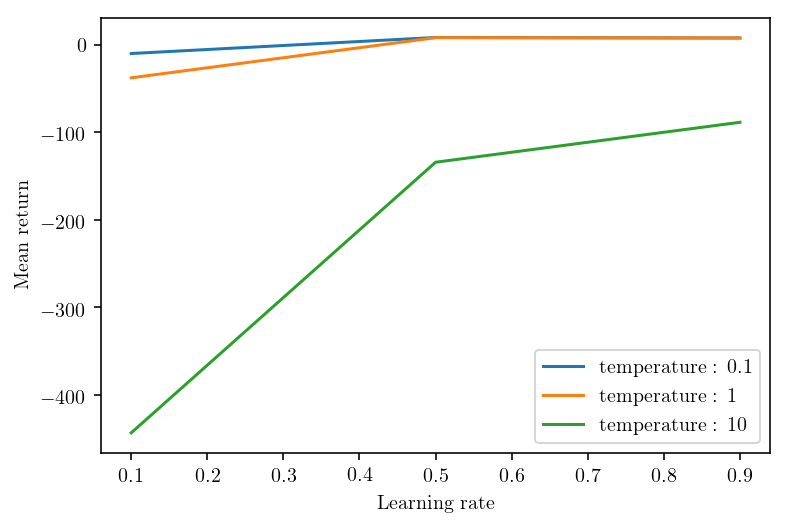

In [54]:
plot_tries(tries, alphas, temperatures, 'expsarsa', mode='training')

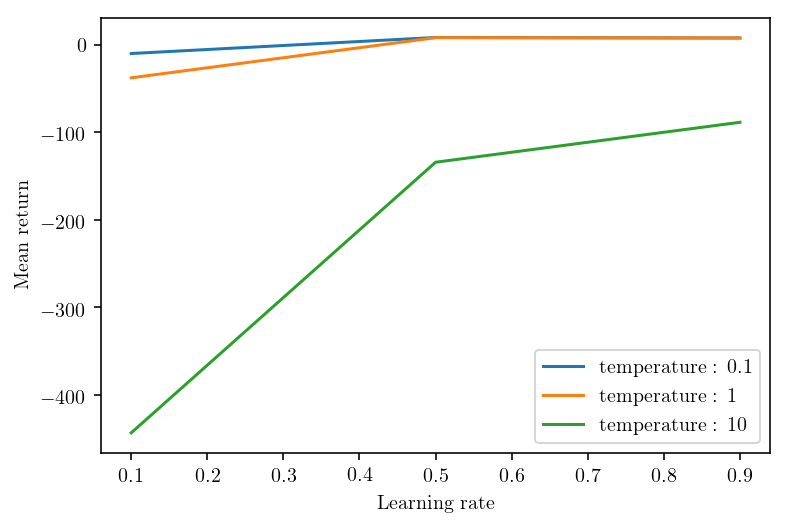

In [55]:
plot_tries(tries, alphas, temperatures, 'expsarsa', mode='testing')

# Q-Learning

In [11]:
agent = module.QLearning(environment, gamma=1, alpha=.9, temperature=1, seed=0, verbose=True)

In [12]:
returns = np.array([agent.run() for _ in range(10)])

100%|#############################################################| 100/100 [00:02<00:00, 44.34it/s]


In [13]:
training_returns = returns[:, :, 0]
tr_mean = training_returns.mean(axis=0)
tr_90 = np.percentile(training_returns, 90, axis=0)
tr_10 = np.percentile(training_returns, 10, axis=0)

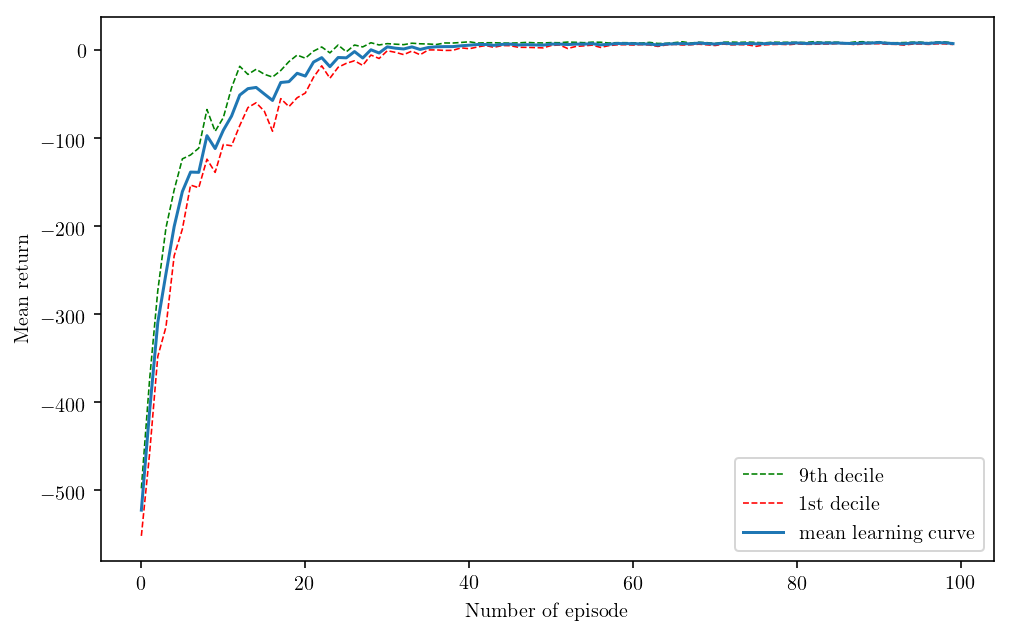

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(tr_90, label='9th decile', linestyle='--', color='green', linewidth=.8)
plt.plot(tr_10, label='1st decile', linestyle='--', color='red', linewidth=.8)
plt.plot(tr_mean, label='mean learning curve')
plt.xlabel('Number of episode')
plt.ylabel('Mean return')
plt.legend()
plt.savefig('graphics/qlearning-learning-curve.pdf', bbox_inches='tight')
plt.show()

In [59]:
tries = try_parameters(module.QLearning, alphas=[0.1, 0.5, .9], temperatures=[.1, 1, 10])


100%|#################################################################| 9/9 [07:17<00:00, 66.83s/it]

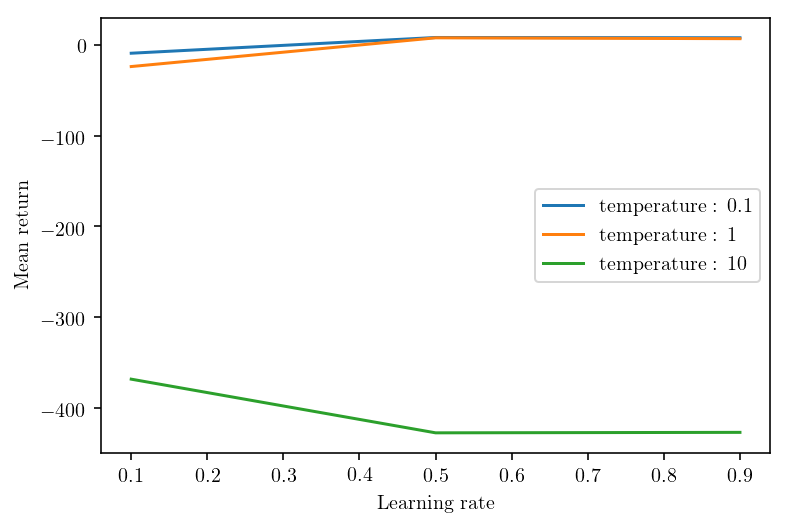

In [61]:
plot_tries(tries, alphas, temperatures, 'qlearning', mode='training')

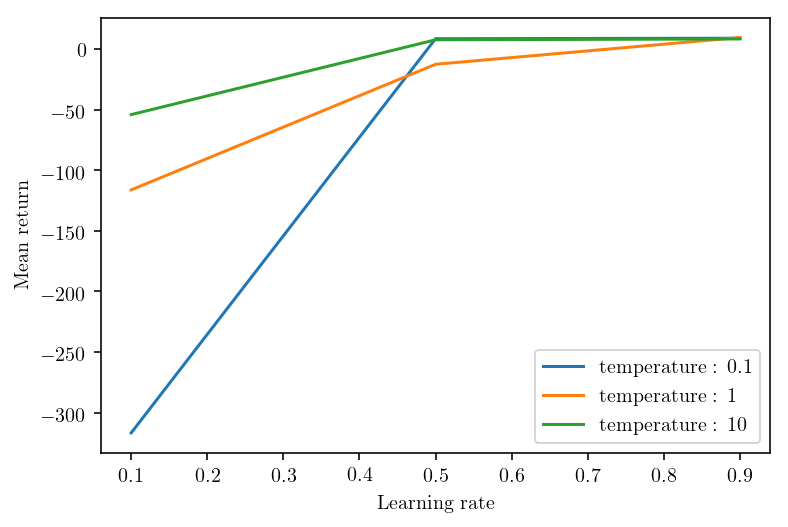

In [62]:
plot_tries(tries, alphas, temperatures, 'qlearning', mode='testing')